# Partygate data analysis

## Loading libraries

In [47]:
### Importing libraries
import pandas as pd
import numpy as np
from datetime import datetime
import os
import matplotlib.dates as mdates
from matplotlib import pyplot as plt
from matplotlib.patches import Ellipse
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd

## Data preprocessing

In [48]:
# Read the CSV file, skipping the first row
pg1 = pd.read_csv("pg1.csv", skiprows=1)
ftse100_1 = pd.read_csv("ftse100_1.csv")
ftseall_1 = pd.read_csv("ftseall_1.csv")
pg2 = pd.read_csv("pg2.csv", skiprows=1)
ftse100_2 = pd.read_csv("ftse100_2.csv")
ftseall_2 = pd.read_csv("ftseall_2.csv")
pg3 = pd.read_csv("pg3.csv", skiprows=1)
pg3 = pg3.drop(0, axis=0) #needed to remove a date due to date missing from ftse data
ftse100_3 = pd.read_csv("ftse100_3.csv")
ftseall_3 = pd.read_csv("ftseall_3.csv")
pg4 = pd.read_csv("pg4.csv", skiprows=1)
ftse100_4 = pd.read_csv("ftse100_4.csv")
ftseall_4 = pd.read_csv("ftseall_4.csv")

In [49]:
print(pg1.head())
print(ftse100_1.head())
print(ftseall_1.head())

          Day  partygate: (United Kingdom)
0  2022-01-01                            0
1  2022-01-02                            0
2  2022-01-03                            0
3  2022-01-04                            0
4  2022-01-05                            0
         Date      Open      High       Low     Close
0  08/01/2022  7,450.24  7,471.87  7,408.94  7,413.42
1  07/29/2022  7,345.25  7,441.20  7,345.25  7,423.43
2  07/28/2022  7,348.23  7,396.20  7,308.99  7,345.25
3  07/27/2022  7,306.28  7,365.22  7,306.28  7,348.23
4  07/26/2022  7,306.30  7,365.37  7,301.19  7,306.28
         Date      Open      High       Low     Close
0  08/01/2022  4,119.04  4,128.89  4,097.44  4,100.09
1  07/29/2022  4,061.26  4,116.99  4,061.25  4,107.01
2  07/28/2022  4,055.16  4,079.44  4,040.69  4,061.26
3  07/27/2022  4,033.75  4,063.77  4,033.75  4,055.16
4  07/26/2022  4,041.31  4,066.86  4,030.59  4,033.75


In [50]:
# Rename the relevance columns
pg1 = pg1.rename(columns={"Day": "Date", "partygate: (United Kingdom)": "Relevance"})
pg2 = pg2.rename(columns={"Day": "Date", "partygate: (United Kingdom)": "Relevance"})
pg3 = pg3.rename(columns={"Day": "Date", "partygate: (United Kingdom)": "Relevance"})
pg4 = pg4.rename(columns={"Day": "Date", "partygate: (United Kingdom)": "Relevance"})


#set relevance column to date time
pg1['Date'] = pd.to_datetime(pg1['Date'])
pg2['Date'] = pd.to_datetime(pg2['Date'])
pg3['Date'] = pd.to_datetime(pg3['Date'])
pg4['Date'] = pd.to_datetime(pg4['Date'])


# Drop the specified columns
ftse100_1.drop(["Open", "High", "Low"], axis=1, inplace=True)
ftseall_1.drop(["Open", "High", "Low"], axis=1, inplace=True)
ftse100_2.drop(["Open", "High", "Low"], axis=1, inplace=True)
ftseall_2.drop(["Open", "High", "Low"], axis=1, inplace=True)
ftse100_3.drop(["Open", "High", "Low"], axis=1, inplace=True)
ftseall_3.drop(["Open", "High", "Low"], axis=1, inplace=True)
ftse100_4.drop(["Open", "High", "Low"], axis=1, inplace=True)
ftseall_4.drop(["Open", "High", "Low"], axis=1, inplace=True)

#Change ftse date column to datetime
ftse100_1['Date'] = pd.to_datetime(ftse100_1['Date'])
ftseall_1['Date'] = pd.to_datetime(ftseall_1['Date'])
ftse100_2['Date'] = pd.to_datetime(ftse100_2['Date'])
ftseall_2['Date'] = pd.to_datetime(ftseall_2['Date'])
ftse100_3['Date'] = pd.to_datetime(ftse100_3['Date'])
ftseall_3['Date'] = pd.to_datetime(ftseall_3['Date'])
ftseall_4['Date'] = pd.to_datetime(ftseall_4['Date'])
ftse100_4['Date'] = pd.to_datetime(ftse100_4['Date'])


#combine ftse data
ftsemerge_1 = pd.merge(ftse100_1, ftseall_1, on='Date')
ftsemerge_2 = pd.merge(ftse100_2, ftseall_2, on='Date')
ftsemerge_3 = pd.merge(ftse100_3, ftseall_3, on='Date')
ftsemerge_4 = pd.merge(ftse100_4, ftseall_4, on='Date')

In [51]:
#rename merged ftse columns
ftsemerge_1.rename(columns={'Close_x': 'FTSE100'}, inplace=True)
ftsemerge_1.rename(columns={'Close_y': 'FTSEALL'}, inplace=True)
ftsemerge_2.rename(columns={'Close_x': 'FTSE100'}, inplace=True)
ftsemerge_2.rename(columns={'Close_y': 'FTSEALL'}, inplace=True)
ftsemerge_3.rename(columns={'Close_x': 'FTSE100'}, inplace=True)
ftsemerge_3.rename(columns={'Close_y': 'FTSEALL'}, inplace=True)
ftsemerge_4.rename(columns={'Close_x': 'FTSE100'}, inplace=True)
ftsemerge_4.rename(columns={'Close_y': 'FTSEALL'}, inplace=True)

# Replace commas in ftse data so they can be converted to float values
ftsemerge_1 = ftsemerge_1.replace(',', '', regex=True)
ftsemerge_2 = ftsemerge_2.replace(',', '', regex=True)
ftsemerge_3 = ftsemerge_3.replace(',', '', regex=True)
ftsemerge_4 = ftsemerge_4.replace(',', '', regex=True)



# Convert the ftse columns from string to float
ftsemerge_1['FTSE100'] = pd.to_numeric(ftsemerge_1['FTSE100'])
ftsemerge_1['FTSEALL'] = pd.to_numeric(ftsemerge_1['FTSEALL'])
ftsemerge_2['FTSE100'] = pd.to_numeric(ftsemerge_2['FTSE100'])
ftsemerge_2['FTSEALL'] = pd.to_numeric(ftsemerge_2['FTSEALL'])
ftsemerge_3['FTSE100'] = pd.to_numeric(ftsemerge_3['FTSE100'])
ftsemerge_3['FTSEALL'] = pd.to_numeric(ftsemerge_3['FTSEALL'])
ftsemerge_4['FTSE100'] = pd.to_numeric(ftsemerge_4['FTSE100'])
ftsemerge_4['FTSEALL'] = pd.to_numeric(ftsemerge_4['FTSEALL'])


#convert combined ftse to datetime
ftsemerge_1['Date'] = pd.to_datetime(ftsemerge_1['Date'])
ftsemerge_2['Date'] = pd.to_datetime(ftsemerge_2['Date'])
ftsemerge_3['Date'] = pd.to_datetime(ftsemerge_3['Date'])
ftsemerge_4['Date'] = pd.to_datetime(ftsemerge_4['Date'])

### Add rolling occurence column - 3 day

In [52]:
# Calculate the rolling sum and create a new column with the result
pg1['occurrences_rolling'] = pg1['Relevance'].rolling(window=3, min_periods=1).mean()
# Calculate the rolling sum and create a new column with the result
pg2['occurrences_rolling'] = pg2['Relevance'].rolling(window=3, min_periods=1).mean()
# Calculate the rolling sum and create a new column with the result
pg3['occurrences_rolling'] = pg3['Relevance'].rolling(window=3, min_periods=1).mean()
# Calculate the rolling sum and create a new column with the result
pg4['occurrences_rolling'] = pg4['Relevance'].rolling(window=3, min_periods=1).mean()

### Add lag variable

In [53]:
pg1['Relevance_lead1'] = pg1['Relevance'].shift(-1)
pg1['Relevance_lead2'] = pg1['Relevance'].shift(-2)
pg1['Relevance_lead3'] = pg1['Relevance'].shift(-3)

pg2['Relevance_lead1'] = pg2['Relevance'].shift(-1)
pg2['Relevance_lead2'] = pg2['Relevance'].shift(-2)
pg2['Relevance_lead3'] = pg2['Relevance'].shift(-3)

pg3['Relevance_lead1'] = pg3['Relevance'].shift(-1)
pg3['Relevance_lead2'] = pg3['Relevance'].shift(-2)
pg3['Relevance_lead3'] = pg3['Relevance'].shift(-3)

pg4['Relevance_lead1'] = pg4['Relevance'].shift(-1)
pg4['Relevance_lead2'] = pg4['Relevance'].shift(-2)
pg4['Relevance_lead3'] = pg4['Relevance'].shift(-3)

In [54]:
#merge google trend and stock data
df1 = pd.merge(ftsemerge_1, pg1, on='Date')
df2 = pd.merge(ftsemerge_2, pg2, on='Date')
df3 = pd.merge(ftsemerge_3, pg3, on='Date')
df4 = pd.merge(ftsemerge_4, pg4, on='Date')

#convert to datetime
df1['Date'] = pd.to_datetime(df1['Date'])
df2['Date'] = pd.to_datetime(df2['Date'])
df3['Date'] = pd.to_datetime(df3['Date'])
df4['Date'] = pd.to_datetime(df4['Date'])

# Sort DataFrame by the 'Date' column in ascending order
df1 = df1.sort_values(by='Date')
df2 = df2.sort_values(by='Date')
df3 = df3.sort_values(by='Date')
df4 = df4.sort_values(by='Date')

# Reset index
df1 = df1.reset_index(drop=True)
df2 = df2.reset_index(drop=True)
df3 = df3.reset_index(drop=True)
df4 = df4.reset_index(drop=True)


## Plotting graphs - google trends

TIME TO LOOK AT :\
	•  01/01/2022 - 01/08/2022 \
	• 01/01/2023 - 01/04/2023 \
	• 01/05/2023 - 01/08/2023 \
14/09/2023 - 15/11/2023

In [55]:
df1.head()

,Date,FTSE100,FTSEALL,Relevance,occurrences_rolling,Relevance_lead1,Relevance_lead2,Relevance_lead3
0,2022-01-04,7505.15,4276.18,0,0.0,0.0,0.0,0.0
1,2022-01-05,7516.87,4277.51,0,0.0,0.0,0.0,0.0
2,2022-01-06,7450.37,4235.63,0,0.0,0.0,0.0,0.0
3,2022-01-07,7485.28,4249.43,0,0.0,0.0,0.0,0.0
4,2022-01-10,7445.25,4219.71,0,0.0,0.0,7.0,8.0


### Time frame 1 - 01/01/2022 - 01/08/2022

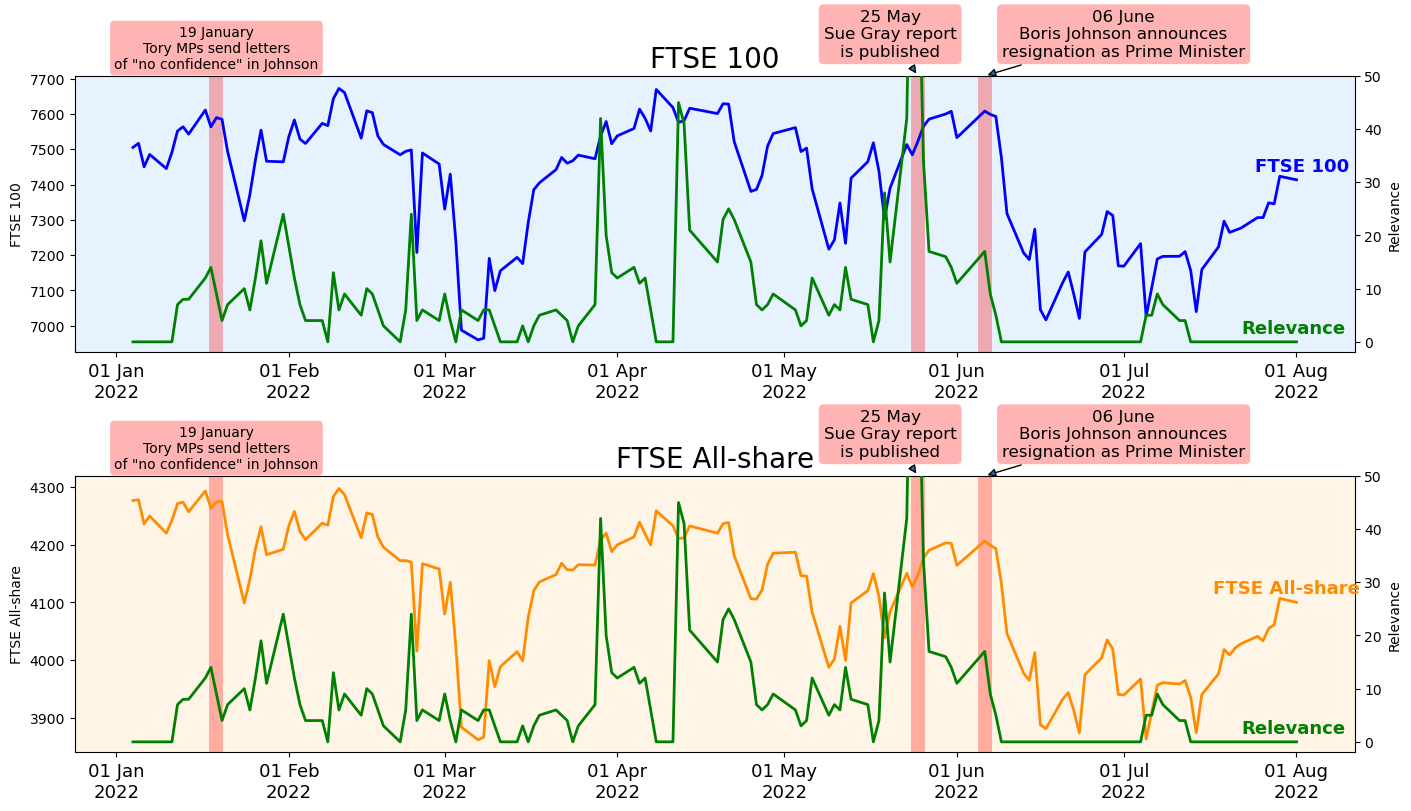

In [56]:
plt.style.use('default')
date_format = mdates.DateFormatter('%d %b\n%Y')
fig, axes = plt.subplots(ncols=1, nrows=2, constrained_layout=True, figsize=(14, 8))
axes = axes.flatten()
ax1 = axes[0]
ax2 = axes[1]
ax1.set_facecolor('#e6f3ff')
ax2.set_facecolor('#fff5e6')
# Plot on the first subplot
# Add vertical lines
ax1.axvline(x=pd.Timestamp('2022-01-19'), color='red', linestyle='-', zorder=-1,linewidth=10, alpha=0.3)
ax1.axvline(x=pd.Timestamp('2022-05-25'), color='red', linestyle='-', zorder=-1,linewidth=10, alpha=0.3)
ax1.axvline(x=pd.Timestamp('2022-06-06'), color='red', linestyle='-', zorder=-1,linewidth=10, alpha=0.3)
line1, = ax1.plot(df1['Date'], df1['FTSE100'], label='FTSE 100', color='blue',zorder=4, linewidth=2,alpha=1)
ax1.set_ylabel('FTSE 100')
ax1.set_title('FTSE 100', fontsize=20, color='black')

# Plot the 'Relevance' data on the same subplot
ax1_relevance = ax1.twinx()
line2, = ax1_relevance.plot(df1['Date'], df1['Relevance'], color='green', alpha=1, label='Relevance',linewidth=2,zorder=3)
ax1_relevance.set_ylabel('Relevance', color='black')
#colour axis
ax1_relevance.tick_params(axis='y', color='black')
ax1.tick_params(axis='y', colors='black')
ax1.tick_params(axis='x',labelsize=13)
# Remove border around the plot
ax1_relevance.spines['top'].set_visible(False)
ax1_relevance.spines['right'].set_visible(False)
ax1_relevance.spines['bottom'].set_visible(False)
ax1_relevance.spines['left'].set_visible(False)

ax1_relevance.set_ylim([-2, 50])
##annotate
ax1_relevance.annotate('19 January\nTory MPs send letters\nof "no confidence" in Johnson',
            xy=(pd.Timestamp('2022-01-19'), ax1_relevance.get_ylim()[1]), xycoords='data',
            xytext=(0, 20), textcoords='offset points', size=10, va="center", ha='center',
            bbox=dict(boxstyle="round", fc=(1.0, 0.7, 0.7), ec="none"))

ax1_relevance.annotate('25 May\nSue Gray report\nis published',
            xy=(pd.Timestamp('2022-05-25'), ax1_relevance.get_ylim()[1]), xycoords='data',
            xytext=(-20, 30), textcoords='offset points',
            size=12, va="center", ha='center',
            bbox=dict(boxstyle="round", fc=(1.0, 0.7, 0.7), ec="none"),
                      arrowprops=dict(arrowstyle ="-|>"))


ax1_relevance.annotate('06 June\nBoris Johnson announces\nresignation as Prime Minister',
            xy=(pd.Timestamp('2022-06-06'), ax1_relevance.get_ylim()[1]), xycoords='data',
            xytext=(100, 30), textcoords='offset points',
            size=12, va="center", ha='center',
            bbox=dict(boxstyle="round", fc=(1.0, 0.7, 0.7), ec="none"),
                      arrowprops=dict(arrowstyle ="-|>"))

# Annotate the end of the lines with their labels
ax1.annotate('FTSE 100', xy=(df1['Date'].iloc[-1], df1['FTSE100'].iloc[-1]),
             xytext=(-30, 10), textcoords='offset points',
             ha='left', va='center', color=line1.get_color(), fontsize=13, zorder=100, fontweight='bold',
             bbox=dict(boxstyle='round,pad=0.0',facecolor='none',edgecolor='none'))

ax1_relevance.annotate('Relevance', xy=(df1['Date'].iloc[-1], df1['Relevance'].iloc[-1]),
             xytext=(-40, 10), textcoords='offset points',
             ha='left', va='center', color=line2.get_color(), fontsize=13, zorder=100, fontweight='bold',
                      bbox=dict(boxstyle='round4,pad=0.0',facecolor='none',edgecolor='none'))

plt.gca().xaxis.set_major_formatter(date_format)

# SECONDPLOT
# Add vertical lines
ax2.axvline(x=pd.Timestamp('2022-01-19'), color='red', linestyle='-', zorder=-1,linewidth=10, alpha=0.3)
ax2.axvline(x=pd.Timestamp('2022-05-25'), color='red', linestyle='-', zorder=-1,linewidth=10, alpha=0.3)
ax2.axvline(x=pd.Timestamp('2022-06-06'), color='red', linestyle='-', zorder=-1,linewidth=10, alpha=0.3)
line3, = ax2.plot(df1['Date'], df1['FTSEALL'], label='FTSE All-share', color='darkorange',linewidth=2,zorder=7, alpha=1)
ax2.set_ylabel('FTSE All-share')
ax2.set_title('FTSE All-share', fontsize=20, color='black')
# Plot the 'Relevance' data on the same subplot
ax2_relevance = ax2.twinx()
line4, = ax2_relevance.plot(df1['Date'], df1['Relevance'], color='green', alpha=1, label='Relevance',linewidth=2,zorder=5)
ax2_relevance.set_ylabel('Relevance', color='black')
#colour axis
ax2_relevance.tick_params(axis='y', color='black')
ax2.tick_params(axis='y', colors='black')
ax2.tick_params(axis='x',labelsize=13)
# Remove border around the plot
ax2_relevance.spines['top'].set_visible(False)
ax2_relevance.spines['right'].set_visible(False)
ax2_relevance.spines['bottom'].set_visible(False)
ax2_relevance.spines['left'].set_visible(False)

ax2_relevance.set_ylim([-2, 50])

##annotate
ax2_relevance.annotate('19 January\nTory MPs send letters\nof "no confidence" in Johnson',
            xy=(pd.Timestamp('2022-01-19'), ax1_relevance.get_ylim()[1]), xycoords='data',
            xytext=(0, 20), textcoords='offset points', size=10, va="center", ha='center',
            bbox=dict(boxstyle="round", fc=(1.0, 0.7, 0.7), ec="none"))

ax2_relevance.annotate('25 May\nSue Gray report\nis published',
            xy=(pd.Timestamp('2022-05-25'), ax1_relevance.get_ylim()[1]), xycoords='data',
            xytext=(-20, 30), textcoords='offset points',
            size=12, va="center", ha='center',
            bbox=dict(boxstyle="round", fc=(1.0, 0.7, 0.7), ec="none"),
                      arrowprops=dict(arrowstyle ="-|>"))


ax2_relevance.annotate('06 June\nBoris Johnson announces\nresignation as Prime Minister',
            xy=(pd.Timestamp('2022-06-06'), ax1_relevance.get_ylim()[1]), xycoords='data',
            xytext=(100, 30), textcoords='offset points',
            size=12, va="center", ha='center',
            bbox=dict(boxstyle="round", fc=(1.0, 0.7, 0.7), ec="none"),
                      arrowprops=dict(arrowstyle ="-|>"))

# Annotate the end of the lines with their labels
ax2.annotate('FTSE All-share', xy=(df1['Date'].iloc[-1], df1['FTSEALL'].iloc[-1]),
             xytext=(-60, 10), textcoords='offset points', fontweight='bold',
             ha='left', va='center', color=line3.get_color(), fontsize=13, zorder=100,
                bbox=dict(boxstyle='round,pad=0.1',facecolor='none',edgecolor='none'))

ax2_relevance.annotate('Relevance', xy=(df1['Date'].iloc[-1], df1['Relevance'].iloc[-1]),
             xytext=(-40, 10), textcoords='offset points', fontweight='bold',
             ha='left', va='center', color=line4.get_color(), fontsize=13, zorder=100,
                      bbox=dict(boxstyle='round4,pad=0.0',facecolor='none',edgecolor='none'))

plt.gca().xaxis.set_major_formatter(date_format)
plt.savefig('figures/Partygate_googletrend_TF1.png')  # Save the figure in the "figures" folder
plt.show()

### Timeframe 2: 01/01/2023 - 01/04/2023

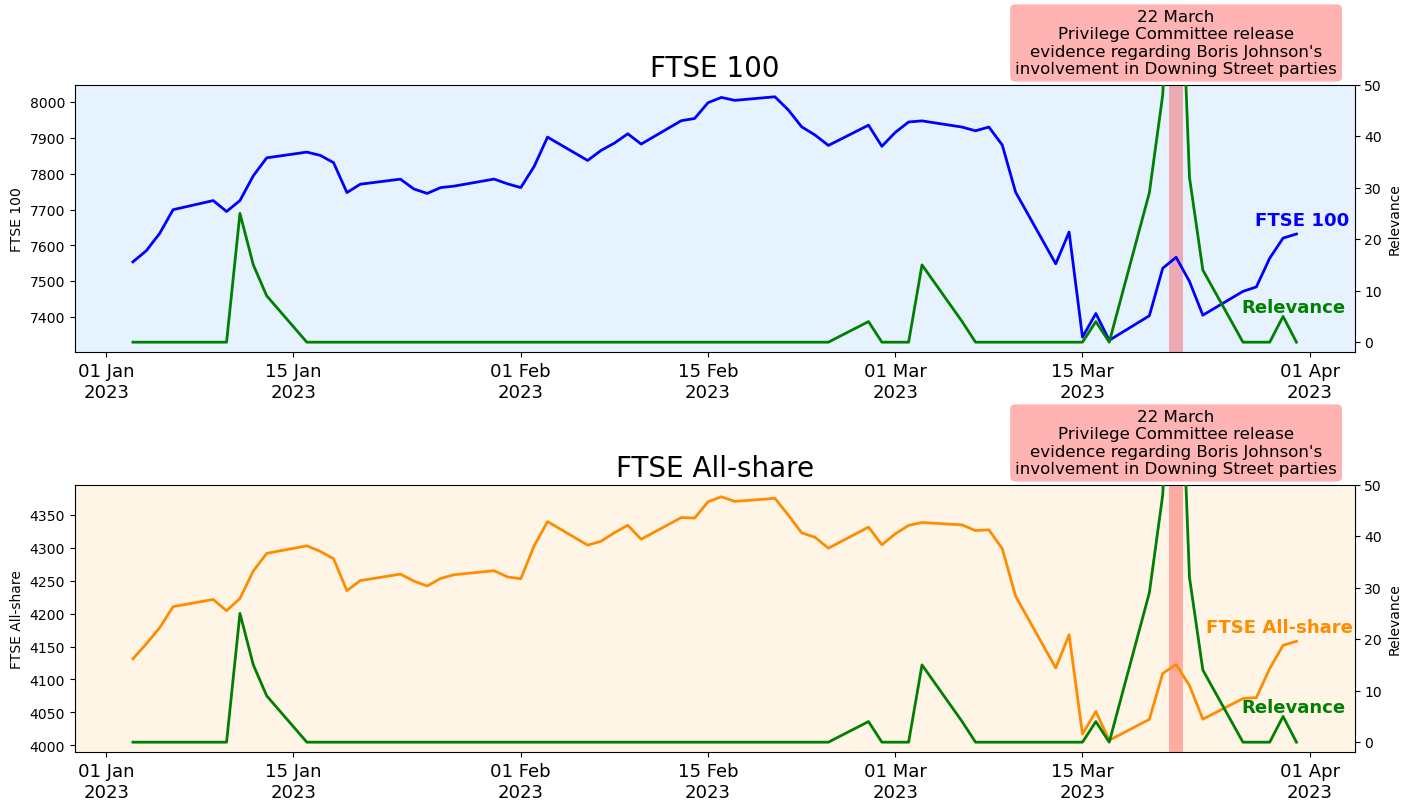

In [57]:
date_format = mdates.DateFormatter('%d %b\n%Y')
fig, axes = plt.subplots(ncols=1, nrows=2, constrained_layout=True, figsize=(14, 8))
axes = axes.flatten()
ax1 = axes[0]
ax2 = axes[1]
ax1.set_facecolor('#e6f3ff')
ax2.set_facecolor('#fff5e6')
# Plot on the first subplot
# Add vertical lines
ax1.axvline(x=pd.Timestamp('2023-03-22'), color='red', linestyle='-', zorder=-1,linewidth=10, alpha=0.3)
line1, = ax1.plot(df2['Date'], df2['FTSE100'], label='FTSE 100', color='blue',zorder=4, linewidth=2,alpha=1)
ax1.set_ylabel('FTSE 100')
ax1.set_title('FTSE 100', fontsize=20, color='black')

# Plot the 'Relevance' data on the same subplot
ax1_relevance = ax1.twinx()
line2, = ax1_relevance.plot(df2['Date'], df2['Relevance'], color='green', alpha=1, label='Relevance',linewidth=2,zorder=3)
ax1_relevance.set_ylabel('Relevance', color='black')
#colour axis
ax1_relevance.tick_params(axis='y', color='black')
ax1.tick_params(axis='y', colors='black')
ax1.tick_params(axis='x',labelsize=13)
# Remove border around the plot
ax1_relevance.spines['top'].set_visible(False)
ax1_relevance.spines['right'].set_visible(False)
ax1_relevance.spines['bottom'].set_visible(False)
ax1_relevance.spines['left'].set_visible(False)

ax1_relevance.set_ylim([-2, 50])
##annotate
ax1_relevance.annotate("22 March\nPrivilege Committee release\nevidence regarding Boris Johnson's\ninvolvement in Downing Street parties",
            xy=(pd.Timestamp('2023-03-22'), ax1_relevance.get_ylim()[1]), xycoords='data',
            xytext=(0, 30), textcoords='offset points', size=12, va="center", ha='center',
            bbox=dict(boxstyle="round", fc=(1.0, 0.7, 0.7), ec="none"))

# Annotate the end of the lines with their labels
ax1.annotate('FTSE 100', xy=(df2['Date'].iloc[-1], df2['FTSE100'].iloc[-1]),
             xytext=(-30, 10), textcoords='offset points',
             ha='left', va='center', color=line1.get_color(), fontsize=13, zorder=100, fontweight='bold',
             bbox=dict(boxstyle='round,pad=0.0',facecolor='none',edgecolor='none'))

ax1_relevance.annotate('Relevance', xy=(df2['Date'].iloc[-1], df2['Relevance'].iloc[-1]),
             xytext=(-40, 25), textcoords='offset points',
             ha='left', va='center', color=line2.get_color(), fontsize=13, zorder=100, fontweight='bold',
                      bbox=dict(boxstyle='round4,pad=0.0',facecolor='none',edgecolor='none'))

plt.gca().xaxis.set_major_formatter(date_format)

# SECONDPLOT
# Add vertical lines
ax2.axvline(x=pd.Timestamp('2023-03-22'), color='red', linestyle='-', zorder=-1,linewidth=10, alpha=0.3)
line3, = ax2.plot(df2['Date'], df2['FTSEALL'], label='FTSE All-share', color='darkorange',linewidth=2,zorder=7, alpha=1)
ax2.set_ylabel('FTSE All-share')
ax2.set_title('FTSE All-share', fontsize=20, color='black')
# Plot the 'Relevance' data on the same subplot
ax2_relevance = ax2.twinx()
line4, = ax2_relevance.plot(df2['Date'], df2['Relevance'], color='green', alpha=1, label='Relevance',linewidth=2,zorder=5)
ax2_relevance.set_ylabel('Relevance', color='black')
#colour axis
ax2_relevance.tick_params(axis='y', color='black')
ax2.tick_params(axis='y', colors='black')
ax2.tick_params(axis='x',labelsize=13)
# Remove border around the plot
ax2_relevance.spines['top'].set_visible(False)
ax2_relevance.spines['right'].set_visible(False)
ax2_relevance.spines['bottom'].set_visible(False)
ax2_relevance.spines['left'].set_visible(False)

ax2_relevance.set_ylim([-2, 50])

##annotate
ax2_relevance.annotate("22 March\nPrivilege Committee release\nevidence regarding Boris Johnson's\ninvolvement in Downing Street parties",
            xy=(pd.Timestamp('2023-03-22'), ax1_relevance.get_ylim()[1]), xycoords='data',
            xytext=(0, 30), textcoords='offset points', size=12, va="center", ha='center',
            bbox=dict(boxstyle="round", fc=(1.0, 0.7, 0.7), ec="none"))

# Annotate the end of the lines with their labels
ax2.annotate('FTSE All-share', xy=(df2['Date'].iloc[-1], df2['FTSEALL'].iloc[-1]),
             xytext=(-65, 10), textcoords='offset points', fontweight='bold',
             ha='left', va='center', color=line3.get_color(), fontsize=13, zorder=100,
                bbox=dict(boxstyle='round,pad=0.1',facecolor='none',edgecolor='none'))

ax2_relevance.annotate('Relevance', xy=(df2['Date'].iloc[-1], df2['Relevance'].iloc[-1]),
             xytext=(-40, 25), textcoords='offset points', fontweight='bold',
             ha='left', va='center', color=line4.get_color(), fontsize=13, zorder=100,
                      bbox=dict(boxstyle='round4,pad=0.0',facecolor='none',edgecolor='none'))

plt.gca().xaxis.set_major_formatter(date_format)
plt.savefig('figures/Partygate_googletrend_TF2.png')  # Save the figure in the "figures" folder
plt.show()

### Timeframe 3: 01/05/2023 - 01/08/2023

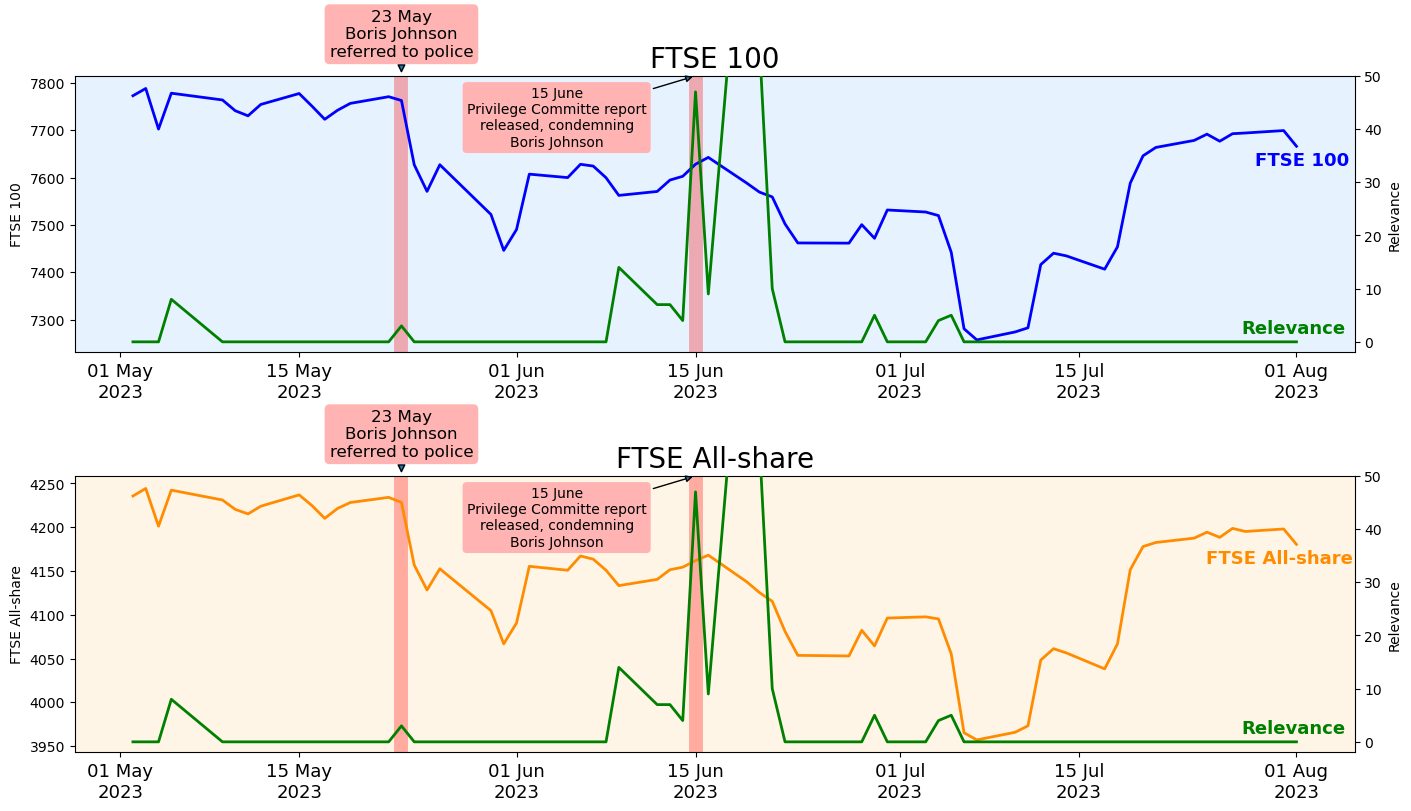

In [58]:
date_format = mdates.DateFormatter('%d %b\n%Y')
fig, axes = plt.subplots(ncols=1, nrows=2, constrained_layout=True, figsize=(14, 8))
axes = axes.flatten()
ax1 = axes[0]
ax2 = axes[1]
ax1.set_facecolor('#e6f3ff')
ax2.set_facecolor('#fff5e6')
# Plot on the first subplot
# Add vertical lines
ax1.axvline(x=pd.Timestamp('2023-05-23'), color='red', linestyle='-', zorder=-1,linewidth=10, alpha=0.3)
ax1.axvline(x=pd.Timestamp('2023-06-15'), color='red', linestyle='-', zorder=-1,linewidth=10, alpha=0.3)
line1, = ax1.plot(df3['Date'], df3['FTSE100'], label='FTSE 100', color='blue',zorder=4, linewidth=2,alpha=1)
ax1.set_ylabel('FTSE 100')
ax1.set_title('FTSE 100', fontsize=20, color='black')

# Plot the 'Relevance' data on the same subplot
ax1_relevance = ax1.twinx()
line2, = ax1_relevance.plot(df3['Date'], df3['Relevance'], color='green', alpha=1, label='Relevance',linewidth=2,zorder=3)
ax1_relevance.set_ylabel('Relevance', color='black')
#colour axis
ax1_relevance.tick_params(axis='y', color='black')
ax1.tick_params(axis='y', colors='black')
ax1.tick_params(axis='x',labelsize=13)
# Remove border around the plot
ax1_relevance.spines['top'].set_visible(False)
ax1_relevance.spines['right'].set_visible(False)
ax1_relevance.spines['bottom'].set_visible(False)
ax1_relevance.spines['left'].set_visible(False)

ax1_relevance.set_ylim([-2, 50])
##annotate
ax1_relevance.annotate("23 May\nBoris Johnson\nreferred to police",
            xy=(pd.Timestamp('2023-05-23'), ax1_relevance.get_ylim()[1]), xycoords='data',
            xytext=(0, 30), textcoords='offset points', size=12, va="center", ha='center',
            bbox=dict(boxstyle="round", fc=(1.0, 0.7, 0.7), ec="none"),
                      arrowprops=dict(arrowstyle="-|>"))

ax1_relevance.annotate("15 June\nPrivilege Committe report\nreleased, condemning\nBoris Johnson",
            xy=(pd.Timestamp('2023-06-15'), ax1_relevance.get_ylim()[1]), xycoords='data',
            xytext=(-100, -30), textcoords='offset points', size=10, va="center", ha='center',
            bbox=dict(boxstyle="round", fc=(1.0, 0.7, 0.7), ec="none"),
                      arrowprops=dict(arrowstyle ="-|>"))
# Annotate the end of the lines with their labels
ax1.annotate('FTSE 100', xy=(df3['Date'].iloc[-1], df3['FTSE100'].iloc[-1]),
             xytext=(-30, -10), textcoords='offset points',
             ha='left', va='center', color=line1.get_color(), fontsize=13, zorder=100, fontweight='bold',
             bbox=dict(boxstyle='round,pad=0.0',facecolor='none',edgecolor='none'))

ax1_relevance.annotate('Relevance', xy=(df3['Date'].iloc[-1], df3['Relevance'].iloc[-1]),
             xytext=(-40, 10), textcoords='offset points',
             ha='left', va='center', color=line2.get_color(), fontsize=13, zorder=100, fontweight='bold',
                      bbox=dict(boxstyle='round4,pad=0.0',facecolor='none',edgecolor='none'))

plt.gca().xaxis.set_major_formatter(date_format)

# SECONDPLOT
# Add vertical lines
ax2.axvline(x=pd.Timestamp('2023-05-23'), color='red', linestyle='-', zorder=-1,linewidth=10, alpha=0.3)
ax2.axvline(x=pd.Timestamp('2023-06-15'), color='red', linestyle='-', zorder=-1,linewidth=10, alpha=0.3)
line3, = ax2.plot(df3['Date'], df3['FTSEALL'], label='FTSE All-share', color='darkorange',linewidth=2,zorder=7, alpha=1)
ax2.set_ylabel('FTSE All-share')
ax2.set_title('FTSE All-share', fontsize=20, color='black')
# Plot the 'Relevance' data on the same subplot
ax2_relevance = ax2.twinx()
line4, = ax2_relevance.plot(df3['Date'], df3['Relevance'], color='green', alpha=1, label='Relevance',linewidth=2,zorder=5)
ax2_relevance.set_ylabel('Relevance', color='black')
#colour axis
ax2_relevance.tick_params(axis='y', color='black')
ax2.tick_params(axis='y', colors='black')
ax2.tick_params(axis='x',labelsize=13)
# Remove border around the plot
ax2_relevance.spines['top'].set_visible(False)
ax2_relevance.spines['right'].set_visible(False)
ax2_relevance.spines['bottom'].set_visible(False)
ax2_relevance.spines['left'].set_visible(False)

ax2_relevance.set_ylim([-2, 50])

##annotate
ax2_relevance.annotate("23 May\nBoris Johnson\nreferred to police",
            xy=(pd.Timestamp('2023-05-23'), ax1_relevance.get_ylim()[1]), xycoords='data',
            xytext=(0, 30), textcoords='offset points', size=12, va="center", ha='center',
            bbox=dict(boxstyle="round", fc=(1.0, 0.7, 0.7), ec="none"),
                      arrowprops=dict(arrowstyle="-|>"))

ax2_relevance.annotate("15 June\nPrivilege Committe report\nreleased, condemning\nBoris Johnson",
            xy=(pd.Timestamp('2023-06-15'), ax1_relevance.get_ylim()[1]), xycoords='data',
            xytext=(-100, -30), textcoords='offset points', size=10, va="center", ha='center',
            bbox=dict(boxstyle="round", fc=(1.0, 0.7, 0.7), ec="none"),
                      arrowprops=dict(arrowstyle ="-|>"))

# Annotate the end of the lines with their labels
ax2.annotate('FTSE All-share', xy=(df3['Date'].iloc[-1], df3['FTSEALL'].iloc[-1]),
             xytext=(-65, -10), textcoords='offset points', fontweight='bold',
             ha='left', va='center', color=line3.get_color(), fontsize=13, zorder=100,
                bbox=dict(boxstyle='round,pad=0.1',facecolor='none',edgecolor='none'))

ax2_relevance.annotate('Relevance', xy=(df3['Date'].iloc[-1], df3['Relevance'].iloc[-1]),
             xytext=(-40, 10), textcoords='offset points', fontweight='bold',
             ha='left', va='center', color=line4.get_color(), fontsize=13, zorder=100,
                      bbox=dict(boxstyle='round4,pad=0.0',facecolor='none',edgecolor='none'))

plt.gca().xaxis.set_major_formatter(date_format)
plt.savefig('figures/Partygate_googletrend_TF3.png')  # Save the figure in the "figures" folder
plt.show()

### Timeframe 4 14/09/2023 - 15/11/2023

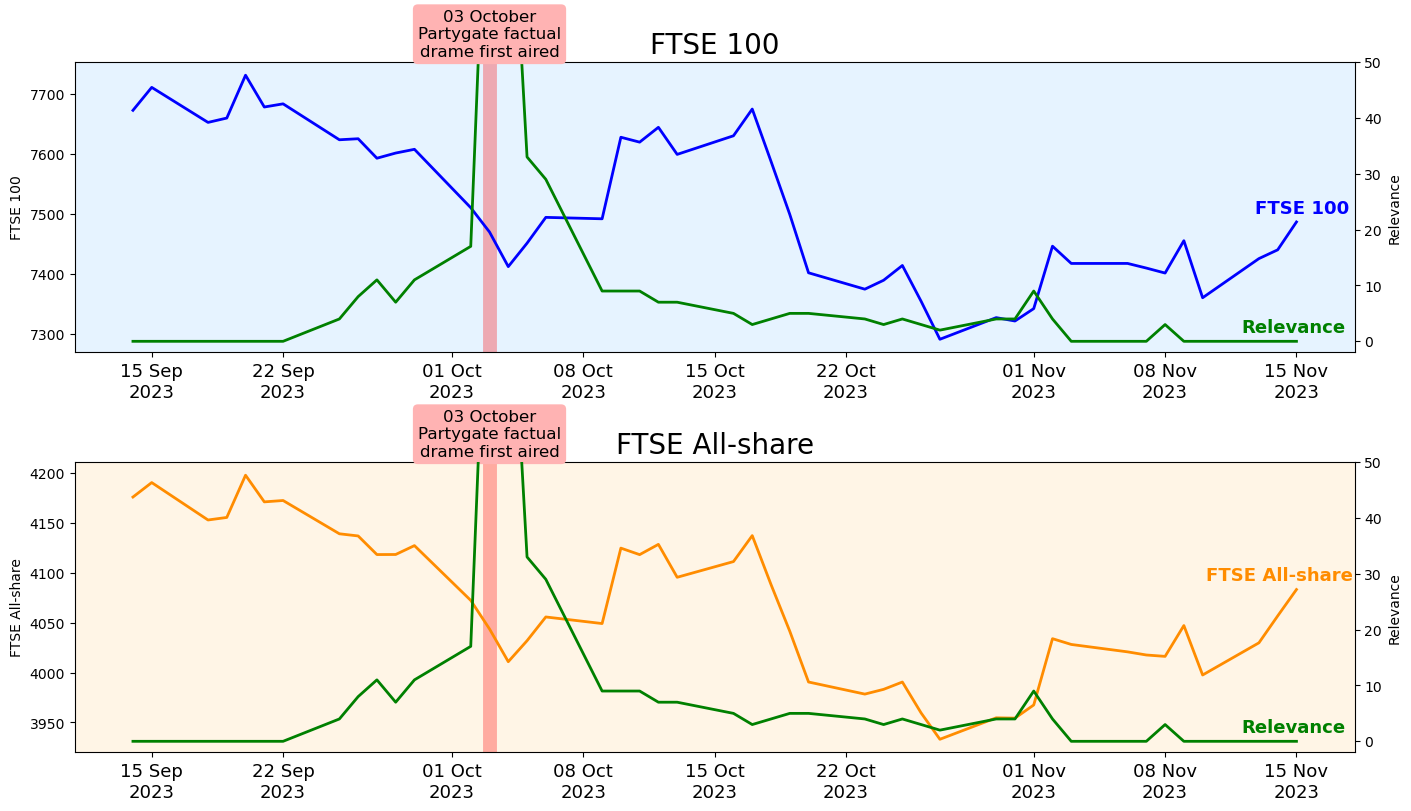

In [59]:
fig, axes = plt.subplots(ncols=1, nrows=2, constrained_layout=True, figsize=(14, 8))
axes = axes.flatten()
ax1 = axes[0]
ax2 = axes[1]
ax1.set_facecolor('#e6f3ff')
ax2.set_facecolor('#fff5e6')
# Plot on the first subplot
# Add vertical lines
ax1.axvline(x=pd.Timestamp('2023-10-03'), color='red', linestyle='-', zorder=-1,linewidth=10, alpha=0.3)
line1, = ax1.plot(df4['Date'], df4['FTSE100'], label='FTSE 100', color='blue',zorder=4, linewidth=2,alpha=1)
ax1.set_ylabel('FTSE 100')
ax1.set_title('FTSE 100', fontsize=20, color='black')

# Plot the 'Relevance' data on the same subplot
ax1_relevance = ax1.twinx()
line2, = ax1_relevance.plot(df4['Date'], df4['Relevance'], color='green', alpha=1, label='Relevance',linewidth=2,zorder=3)
ax1_relevance.set_ylabel('Relevance', color='black')
#colour axis
ax1_relevance.tick_params(axis='y', color='black')
ax1.tick_params(axis='y', colors='black')
ax1.tick_params(axis='x',labelsize=13)
# Remove border around the plot
ax1_relevance.spines['top'].set_visible(False)
ax1_relevance.spines['right'].set_visible(False)
ax1_relevance.spines['bottom'].set_visible(False)
ax1_relevance.spines['left'].set_visible(False)

ax1_relevance.set_ylim([-2, 50])
##annotate
ax1_relevance.annotate("03 October\nPartygate factual\ndrame first aired",
            xy=(pd.Timestamp('2023-10-03'), ax1_relevance.get_ylim()[1]), xycoords='data',
            xytext=(0, 20), textcoords='offset points', size=12, va="center", ha='center',
            bbox=dict(boxstyle="round", fc=(1.0, 0.7, 0.7), ec="none"))

# Annotate the end of the lines with their labels
ax1.annotate('FTSE 100', xy=(df4['Date'].iloc[-1], df4['FTSE100'].iloc[-1]),
             xytext=(-30, 10), textcoords='offset points',
             ha='left', va='center', color=line1.get_color(), fontsize=13, zorder=100, fontweight='bold',
             bbox=dict(boxstyle='round,pad=0.0',facecolor='none',edgecolor='none'))

ax1_relevance.annotate('Relevance', xy=(df4['Date'].iloc[-1], df4['Relevance'].iloc[-1]),
             xytext=(-40, 10), textcoords='offset points',
             ha='left', va='center', color=line2.get_color(), fontsize=13, zorder=100, fontweight='bold',
                      bbox=dict(boxstyle='round4,pad=0.0',facecolor='none',edgecolor='none'))

plt.gca().xaxis.set_major_formatter(date_format)

# SECONDPLOT
# Add vertical lines
ax2.axvline(x=pd.Timestamp('2023-10-03'), color='red', linestyle='-', zorder=-1,linewidth=10, alpha=0.3)

line3, = ax2.plot(df4['Date'], df4['FTSEALL'], label='FTSE All-share', color='darkorange',linewidth=2,zorder=7, alpha=1)
ax2.set_ylabel('FTSE All-share')
ax2.set_title('FTSE All-share', fontsize=20, color='black')
# Plot the 'Relevance' data on the same subplot
ax2_relevance = ax2.twinx()
line4, = ax2_relevance.plot(df4['Date'], df4['Relevance'], color='green', alpha=1, label='Relevance',linewidth=2,zorder=5)
ax2_relevance.set_ylabel('Relevance', color='black')
#colour axis
ax2_relevance.tick_params(axis='y', color='black')
ax2.tick_params(axis='y', colors='black')
ax2.tick_params(axis='x',labelsize=13)
# Remove border around the plot
ax2_relevance.spines['top'].set_visible(False)
ax2_relevance.spines['right'].set_visible(False)
ax2_relevance.spines['bottom'].set_visible(False)
ax2_relevance.spines['left'].set_visible(False)

ax2_relevance.set_ylim([-2, 50])

##annotate
ax2_relevance.annotate("03 October\nPartygate factual\ndrame first aired",
            xy=(pd.Timestamp('2023-10-03'), ax1_relevance.get_ylim()[1]), xycoords='data',
            xytext=(0, 20), textcoords='offset points', size=12, va="center", ha='center',
            bbox=dict(boxstyle="round", fc=(1.0, 0.7, 0.7), ec="none"))

# Annotate the end of the lines with their labels
ax2.annotate('FTSE All-share', xy=(df4['Date'].iloc[-1], df4['FTSEALL'].iloc[-1]),
             xytext=(-65, 10), textcoords='offset points', fontweight='bold',
             ha='left', va='center', color=line3.get_color(), fontsize=13, zorder=100,
                bbox=dict(boxstyle='round,pad=0.1',facecolor='none',edgecolor='none'))

ax2_relevance.annotate('Relevance', xy=(df4['Date'].iloc[-1], df4['Relevance'].iloc[-1]),
             xytext=(-40, 10), textcoords='offset points', fontweight='bold',
             ha='left', va='center', color=line4.get_color(), fontsize=13, zorder=100,
                      bbox=dict(boxstyle='round4,pad=0.0',facecolor='none',edgecolor='none'))

plt.gca().xaxis.set_major_formatter(date_format)
plt.savefig('figures/Partygate_googletrend_TF4.png')  # Save the figure in the "figures" folder
plt.show()

In [61]:
# Save the DataFrame to a CSV file
df1.to_csv('partygatetf1_040122to010822.csv', index=False) 
df2.to_csv('partygatetf2_030123to310323.csv', index=False)  
df3.to_csv('partygatetf3_020523to010823.csv', index=False) 
df4.to_csv('partygatetf4_140923to151123.csv', index=False)  

In [62]:
# Save the DataFrame to a Stata file
df1.to_stata('partygatetf1_040122to010822.dta', version=117) 
df2.to_stata('partygatetf2_030123to310323.dta', version=117)
df3.to_stata('partygatetf3_020523to010823.dta', version=117)
df4.to_stata('partygatetf4_140923to151123.dta', version=117)

# Newspaper

In [63]:
df = pd.read_csv("partygate_newspaper.csv")

In [64]:
# Generate a date range from '2022-01-01' to '2023-11-15'
date_range = pd.date_range(start='2022-01-01', end='2023-11-15', freq='D')

# Calculate the week numbers based on groups of 7 days
week_numbers = ((date_range - date_range[0]).days // 7) + 1

# Create an empty DataFrame with the date range as the index
empty_df = pd.DataFrame(index=date_range)

# Assign the calculated week numbers
empty_df['week'] = week_numbers

# Reset the index to make 'PubDate' a regular column
empty_df = empty_df.reset_index()

# Rename the 'index' column to 'PubDate'
empty_df = empty_df.rename(columns={'index': 'PubDate'})

print(empty_df)

       PubDate  week
0   2022-01-01     1
1   2022-01-02     1
2   2022-01-03     1
3   2022-01-04     1
4   2022-01-05     1
..         ...   ...
679 2023-11-11    98
680 2023-11-12    98
681 2023-11-13    98
682 2023-11-14    98
683 2023-11-15    98

[684 rows x 2 columns]


In [65]:
###convert pubdate to datetime
df['PubDate'] = pd.to_datetime(df['PubDate'], format='%Y-%m-%d')
df['PubDate'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 370 entries, 0 to 369
Series name: PubDate
Non-Null Count  Dtype         
--------------  -----         
370 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 3.0 KB


In [66]:
###sort by date
df = df.sort_values(by='PubDate')
df.head()

,Title,Subtitle,Author,Publication,SourceType,Publisher,Volume,Issue,PubDate,AlphaDate,StartPage,EndPage,PageRange,ISSN,EISSN,ISBN,Language,DocumentUrl,DOI
361,"January 11, 2022 (Page 5)",NaN,NaN,(Page 5),Historical Newspapers,NaN,NaN,NaN,2022-01-11,"Jan 11, 2022",5,NaN,NaN,2516-6468,NaN,NaN,ENG,https://uoelibrary.idm.oclc.org/login?url=http...,NaN
299,"January 12, 2022 (Page 6)",NaN,NaN,(Page 6),Historical Newspapers,NaN,NaN,NaN,2022-01-12,"Jan 12, 2022",6,NaN,NaN,2516-6468,NaN,NaN,ENG,https://uoelibrary.idm.oclc.org/login?url=http...,NaN
258,"January 12, 2022 (Page 1)",NaN,NaN,(Page 1),Historical Newspapers,NaN,NaN,NaN,2022-01-12,"Jan 12, 2022",1,NaN,NaN,2516-6468,NaN,NaN,ENG,https://uoelibrary.idm.oclc.org/login?url=http...,NaN
271,"January 13, 2022 (Page 14)",NaN,NaN,(Page 14),Historical Newspapers,NaN,NaN,NaN,2022-01-13,"Jan 13, 2022",14,NaN,NaN,2516-6468,NaN,NaN,ENG,https://uoelibrary.idm.oclc.org/login?url=http...,NaN
330,"January 13, 2022 (Page 5)",NaN,NaN,(Page 5),Historical Newspapers,NaN,NaN,NaN,2022-01-13,"Jan 13, 2022",5,NaN,NaN,2516-6468,NaN,NaN,ENG,https://uoelibrary.idm.oclc.org/login?url=http...,NaN


In [67]:
# Add a new column 'occurrences' with a constant value of 1
df['occurrences'] = 1

In [68]:
# Selecting only the 'PubDate' and 'occurrences' columns
df = df.loc[:, ['PubDate', 'occurrences']]

In [69]:
# Group by 'PubDate' and sum the 'occurrences'
df = df.groupby('PubDate', as_index=False)['occurrences'].sum()
print(df)

       PubDate  occurrences
0   2022-01-11            1
1   2022-01-12            2
2   2022-01-13            3
3   2022-01-14            1
4   2022-01-17            3
..         ...          ...
213 2023-10-30            1
214 2023-11-03            1
215 2023-11-06            1
216 2023-11-08            1
217 2023-11-09            1

[218 rows x 2 columns]


In [70]:
# Reset the index of empty_df to have 'weeks' as a regular column
empty_df.reset_index(inplace=True)



# Merge empty_df with df based on the 'PubDate' column
merged_df = pd.merge(empty_df, df[['PubDate', 'occurrences']], on='PubDate', how='left')



merged_df.rename(columns={'PubDate': 'Date'}, inplace=True)
merged_df['occurrences'] = merged_df['occurrences'].fillna(0)

print(merged_df)

     index       Date  week  occurrences
0        0 2022-01-01     1          0.0
1        1 2022-01-02     1          0.0
2        2 2022-01-03     1          0.0
3        3 2022-01-04     1          0.0
4        4 2022-01-05     1          0.0
..     ...        ...   ...          ...
679    679 2023-11-11    98          0.0
680    680 2023-11-12    98          0.0
681    681 2023-11-13    98          0.0
682    682 2023-11-14    98          0.0
683    683 2023-11-15    98          0.0

[684 rows x 4 columns]


In [71]:
# Calculate the rolling sum and create a new column with the result
merged_df['occurrences_rolling'] = merged_df['occurrences'].rolling(window=3, min_periods=1).mean()

In [72]:
# Assuming df is your DataFrame
merged_df['occurrences_lead1'] = merged_df['occurrences'].shift(-1)
# Assuming df is your DataFrame
merged_df['occurrences_lead2'] = merged_df['occurrences'].shift(-2)
# Assuming df is your DataFrame
merged_df['occurrences_lead3'] = merged_df['occurrences'].shift(-3)

### FTSE for newspaper

In [73]:
ftse100_1 = pd.read_csv("ftse100_2022.csv")
ftse100_2 = pd.read_csv("ftse100_2023.csv")
ftse100_1['Date'] = pd.to_datetime(ftse100_1['Date'], format='%m/%d/%Y')
ftse100_2['Date'] = pd.to_datetime(ftse100_2['Date'], format='%m/%d/%Y')

In [74]:
# Concatenate the DataFrames along the rows
ftse100 = pd.concat([ftse100_1, ftse100_2], ignore_index=True)

In [75]:
ftseall_1 = pd.read_csv("ftseall_2022.csv")
ftseall_2 = pd.read_csv("ftseall_2023.csv")
ftseall_1['Date'] = pd.to_datetime(ftseall_1['Date'], format='%m/%d/%Y')
ftseall_2['Date'] = pd.to_datetime(ftseall_2['Date'], format='%m/%d/%Y')

In [76]:
# Concatenate the DataFrames along the rows
ftseall = pd.concat([ftseall_1, ftseall_2], ignore_index=True)

In [77]:
###drop columns
ftse100.drop(["Open", "High", "Low"], axis=1, inplace=True)
ftseall.drop(["Open", "High", "Low"], axis=1, inplace=True)
#Change ftse date column to datetime
ftse100['Date'] = pd.to_datetime(ftse100['Date'])
ftseall['Date'] = pd.to_datetime(ftseall['Date'])
#rename  ftse columns
ftse100.rename(columns={'Close': 'FTSE100'}, inplace=True)
ftseall.rename(columns={'Close': 'FTSEALL'}, inplace=True)
#combine ftse data
ftsemerge = pd.merge(ftse100, ftseall, on='Date')

In [78]:
ftsemerge['Date'] = pd.to_datetime(ftsemerge['Date'])

In [79]:
# Replace commas in ftse data so they can be converted to float values
ftsemerge = ftsemerge.replace(',', '', regex=True)
# Convert the ftse columns from string to float
ftsemerge['FTSE100'] = pd.to_numeric(ftsemerge['FTSE100'])
ftsemerge['FTSEALL'] = pd.to_numeric(ftsemerge['FTSEALL'])

### Combining ftse and Newspaper

In [80]:
df = pd.merge(merged_df, ftsemerge, on='Date')

In [81]:
df.rename(columns={'occurrences': 'Relevance'}, inplace=True)
df.rename(columns={'occurrences_rolling_avg': 'Relevance_rolling_avg'}, inplace=True)

### Save to csv

In [83]:
# Assuming df is your DataFrame
df.to_csv('Partygate_newspaper_preprocessed.csv', index=False)

### Save to stata

In [84]:
df.to_stata('Partygate_newspaper_preprocessed.dta', version=117) 

## Timeframes

TIME TO LOOK AT :\
	•  01/01/2022 - 01/08/2022 \
	• 01/01/2023 - 01/04/2023 \
	• 01/05/2023 - 01/08/2023 \
14/09/2023 - 15/11/2023

In [85]:
###new timeframe datasets
df1 = df[(df['Date'] >= '2022-01-01') & (df['Date'] <= '2022-08-01')]
df2 = df[(df['Date'] >= '2023-01-01') & (df['Date'] <= '2023-04-01')]
df3 = df[(df['Date'] >= '2023-05-01') & (df['Date'] <= '2023-08-01')]
df4 = df[(df['Date'] >= '2023-09-14') & (df['Date'] <= '2023-11-15')]

## Plot timeframes for newspaper

### Timeframe 1 - 01/01/2022 - 01/08/2022

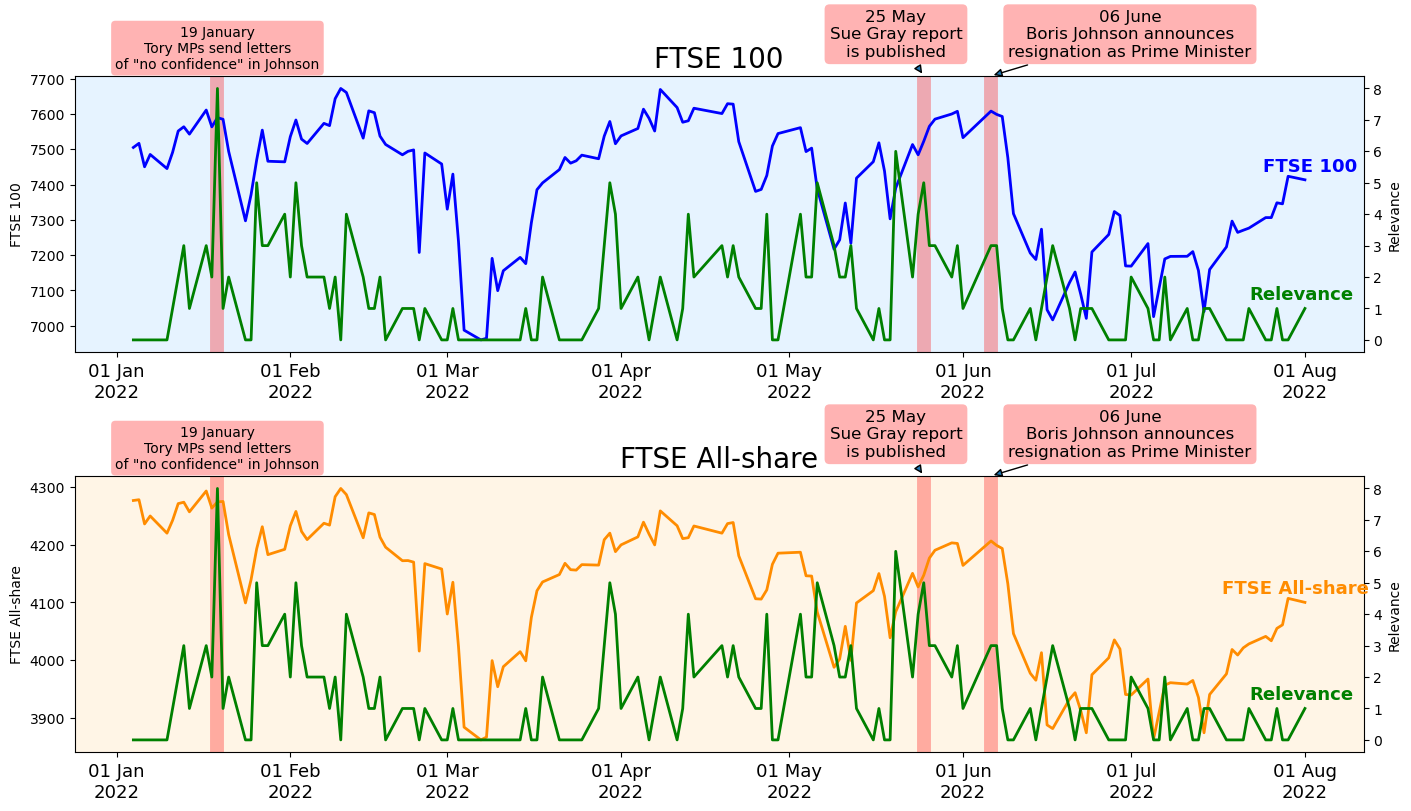

In [86]:
plt.style.use('default')
date_format = mdates.DateFormatter('%d %b\n%Y')
fig, axes = plt.subplots(ncols=1, nrows=2, constrained_layout=True, figsize=(14, 8))
axes = axes.flatten()
ax1 = axes[0]
ax2 = axes[1]
ax1.set_facecolor('#e6f3ff')
ax2.set_facecolor('#fff5e6')
# Plot on the first subplot
# Add vertical lines
ax1.axvline(x=pd.Timestamp('2022-01-19'), color='red', linestyle='-', zorder=-1,linewidth=10, alpha=0.3)
ax1.axvline(x=pd.Timestamp('2022-05-25'), color='red', linestyle='-', zorder=-1,linewidth=10, alpha=0.3)
ax1.axvline(x=pd.Timestamp('2022-06-06'), color='red', linestyle='-', zorder=-1,linewidth=10, alpha=0.3)
line1, = ax1.plot(df1['Date'], df1['FTSE100'], label='FTSE 100', color='blue',zorder=4, linewidth=2,alpha=1)
ax1.set_ylabel('FTSE 100')
ax1.set_title('FTSE 100', fontsize=20, color='black')

# Plot the 'Relevance' data on the same subplot
ax1_relevance = ax1.twinx()
line2, = ax1_relevance.plot(df1['Date'], df1['Relevance'], color='green', alpha=1, label='Relevance',linewidth=2,zorder=3)
ax1_relevance.set_ylabel('Relevance', color='black')
#colour axis
ax1_relevance.tick_params(axis='y', color='black')
ax1.tick_params(axis='y', colors='black')
ax1.tick_params(axis='x',labelsize=13)
# Remove border around the plot
ax1_relevance.spines['top'].set_visible(False)
ax1_relevance.spines['right'].set_visible(False)
ax1_relevance.spines['bottom'].set_visible(False)
ax1_relevance.spines['left'].set_visible(False)

##annotate
ax1_relevance.annotate('19 January\nTory MPs send letters\nof "no confidence" in Johnson',
            xy=(pd.Timestamp('2022-01-19'), ax1_relevance.get_ylim()[1]), xycoords='data',
            xytext=(0, 20), textcoords='offset points', size=10, va="center", ha='center',
            bbox=dict(boxstyle="round", fc=(1.0, 0.7, 0.7), ec="none"))

ax1_relevance.annotate('25 May\nSue Gray report\nis published',
            xy=(pd.Timestamp('2022-05-25'), ax1_relevance.get_ylim()[1]), xycoords='data',
            xytext=(-20, 30), textcoords='offset points',
            size=12, va="center", ha='center',
            bbox=dict(boxstyle="round", fc=(1.0, 0.7, 0.7), ec="none"),
                      arrowprops=dict(arrowstyle ="-|>"))


ax1_relevance.annotate('06 June\nBoris Johnson announces\nresignation as Prime Minister',
            xy=(pd.Timestamp('2022-06-06'), ax1_relevance.get_ylim()[1]), xycoords='data',
            xytext=(100, 30), textcoords='offset points',
            size=12, va="center", ha='center',
            bbox=dict(boxstyle="round", fc=(1.0, 0.7, 0.7), ec="none"),
                      arrowprops=dict(arrowstyle ="-|>"))

# Annotate the end of the lines with their labels
ax1.annotate('FTSE 100', xy=(df1['Date'].iloc[-1], df1['FTSE100'].iloc[-1]),
             xytext=(-30, 10), textcoords='offset points',
             ha='left', va='center', color=line1.get_color(), fontsize=13, zorder=100, fontweight='bold',
             bbox=dict(boxstyle='round,pad=0.0',facecolor='none',edgecolor='none'))

ax1_relevance.annotate('Relevance', xy=(df1['Date'].iloc[-1], df1['Relevance'].iloc[-1]),
             xytext=(-40, 10), textcoords='offset points',
             ha='left', va='center', color=line2.get_color(), fontsize=13, zorder=100, fontweight='bold',
                      bbox=dict(boxstyle='round4,pad=0.0',facecolor='none',edgecolor='none'))

plt.gca().xaxis.set_major_formatter(date_format)

# SECONDPLOT
# Add vertical lines
ax2.axvline(x=pd.Timestamp('2022-01-19'), color='red', linestyle='-', zorder=-1,linewidth=10, alpha=0.3)
ax2.axvline(x=pd.Timestamp('2022-05-25'), color='red', linestyle='-', zorder=-1,linewidth=10, alpha=0.3)
ax2.axvline(x=pd.Timestamp('2022-06-06'), color='red', linestyle='-', zorder=-1,linewidth=10, alpha=0.3)
line3, = ax2.plot(df1['Date'], df1['FTSEALL'], label='FTSE All-share', color='darkorange',linewidth=2,zorder=7, alpha=1)
ax2.set_ylabel('FTSE All-share')
ax2.set_title('FTSE All-share', fontsize=20, color='black')
# Plot the 'Relevance' data on the same subplot
ax2_relevance = ax2.twinx()
line4, = ax2_relevance.plot(df1['Date'], df1['Relevance'], color='green', alpha=1, label='Relevance',linewidth=2,zorder=5)
ax2_relevance.set_ylabel('Relevance', color='black')
#colour axis
ax2_relevance.tick_params(axis='y', color='black')
ax2.tick_params(axis='y', colors='black')
ax2.tick_params(axis='x',labelsize=13)
# Remove border around the plot
ax2_relevance.spines['top'].set_visible(False)
ax2_relevance.spines['right'].set_visible(False)
ax2_relevance.spines['bottom'].set_visible(False)
ax2_relevance.spines['left'].set_visible(False)

##annotate
ax2_relevance.annotate('19 January\nTory MPs send letters\nof "no confidence" in Johnson',
            xy=(pd.Timestamp('2022-01-19'), ax1_relevance.get_ylim()[1]), xycoords='data',
            xytext=(0, 20), textcoords='offset points', size=10, va="center", ha='center',
            bbox=dict(boxstyle="round", fc=(1.0, 0.7, 0.7), ec="none"))

ax2_relevance.annotate('25 May\nSue Gray report\nis published',
            xy=(pd.Timestamp('2022-05-25'), ax1_relevance.get_ylim()[1]), xycoords='data',
            xytext=(-20, 30), textcoords='offset points',
            size=12, va="center", ha='center',
            bbox=dict(boxstyle="round", fc=(1.0, 0.7, 0.7), ec="none"),
                      arrowprops=dict(arrowstyle ="-|>"))


ax2_relevance.annotate('06 June\nBoris Johnson announces\nresignation as Prime Minister',
            xy=(pd.Timestamp('2022-06-06'), ax1_relevance.get_ylim()[1]), xycoords='data',
            xytext=(100, 30), textcoords='offset points',
            size=12, va="center", ha='center',
            bbox=dict(boxstyle="round", fc=(1.0, 0.7, 0.7), ec="none"),
                      arrowprops=dict(arrowstyle ="-|>"))

# Annotate the end of the lines with their labels
ax2.annotate('FTSE All-share', xy=(df1['Date'].iloc[-1], df1['FTSEALL'].iloc[-1]),
             xytext=(-60, 10), textcoords='offset points', fontweight='bold',
             ha='left', va='center', color=line3.get_color(), fontsize=13, zorder=100,
                bbox=dict(boxstyle='round,pad=0.1',facecolor='none',edgecolor='none'))

ax2_relevance.annotate('Relevance', xy=(df1['Date'].iloc[-1], df1['Relevance'].iloc[-1]),
             xytext=(-40, 10), textcoords='offset points', fontweight='bold',
             ha='left', va='center', color=line4.get_color(), fontsize=13, zorder=100,
                      bbox=dict(boxstyle='round4,pad=0.0',facecolor='none',edgecolor='none'))

plt.gca().xaxis.set_major_formatter(date_format)
plt.savefig('figures/Partygate_newspaper_TF1.png')  # Save the figure in the "figures" folder
plt.show()

### Timeframe 2:  01/01/2023 - 01/04/2023

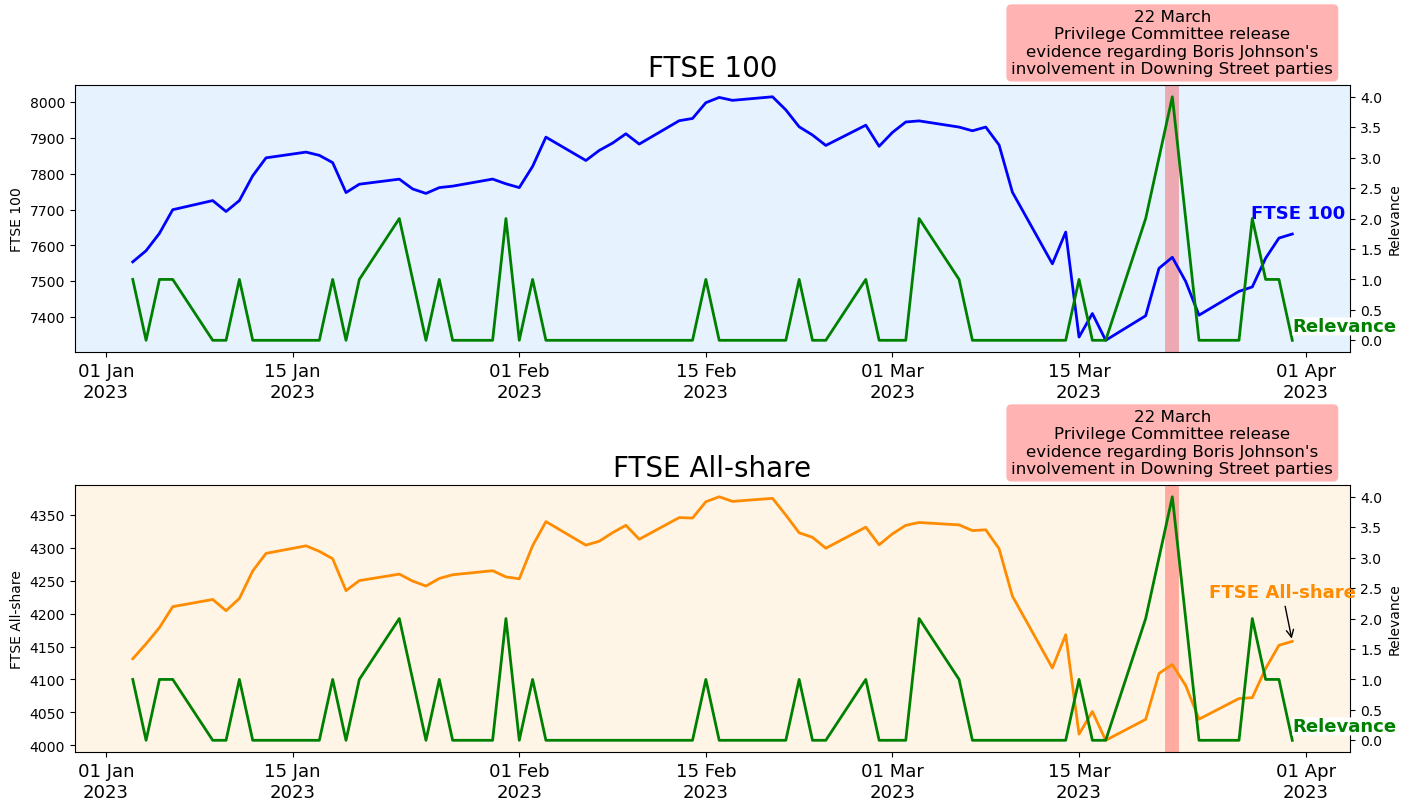

In [87]:
date_format = mdates.DateFormatter('%d %b\n%Y')
fig, axes = plt.subplots(ncols=1, nrows=2, constrained_layout=True, figsize=(14, 8))
axes = axes.flatten()
ax1 = axes[0]
ax2 = axes[1]
ax1.set_facecolor('#e6f3ff')
ax2.set_facecolor('#fff5e6')
# Plot on the first subplot
# Add vertical lines
ax1.axvline(x=pd.Timestamp('2023-03-22'), color='red', linestyle='-', zorder=-1,linewidth=10, alpha=0.3)
line1, = ax1.plot(df2['Date'], df2['FTSE100'], label='FTSE 100', color='blue',zorder=4, linewidth=2,alpha=1)
ax1.set_ylabel('FTSE 100')
ax1.set_title('FTSE 100', fontsize=20, color='black')

# Plot the 'Relevance' data on the same subplot
ax1_Relevance = ax1.twinx()
line2, = ax1_Relevance.plot(df2['Date'], df2['Relevance'], color='green', alpha=1, label='Relevance',linewidth=2,zorder=3)
ax1_Relevance.set_ylabel('Relevance', color='black')
#colour axis
ax1_Relevance.tick_params(axis='y', color='black')
ax1.tick_params(axis='y', colors='black')
ax1.tick_params(axis='x',labelsize=13)
# Remove border around the plot
ax1_Relevance.spines['top'].set_visible(False)
ax1_Relevance.spines['right'].set_visible(False)
ax1_Relevance.spines['bottom'].set_visible(False)
ax1_Relevance.spines['left'].set_visible(False)

##annotate
ax1_Relevance.annotate("22 March\nPrivilege Committee release\nevidence regarding Boris Johnson's\ninvolvement in Downing Street parties",
            xy=(pd.Timestamp('2023-03-22'), ax1_Relevance.get_ylim()[1]), xycoords='data',
            xytext=(0, 30), textcoords='offset points', size=12, va="center", ha='center',
            bbox=dict(boxstyle="round", fc=(1.0, 0.7, 0.7), ec="none"))

# Annotate the end of the lines with their labels
ax1.annotate('FTSE 100', xy=(df2['Date'].iloc[-1], df2['FTSE100'].iloc[-1]),
             xytext=(-30, 15), textcoords='offset points',
             ha='left', va='center', color=line1.get_color(), fontsize=13, zorder=100, fontweight='bold',
             bbox=dict(boxstyle='round,pad=0.0',facecolor='none',edgecolor='none'))

ax1_Relevance.annotate('Relevance', xy=(df2['Date'].iloc[-1], df2['Relevance'].iloc[-1]),
             xytext=(0, 10), textcoords='offset points',
             ha='left', va='center', color=line2.get_color(), fontsize=13, zorder=100, fontweight='bold',
                      bbox=dict(boxstyle='round4,pad=0.0',facecolor='white',edgecolor='none'))

plt.gca().xaxis.set_major_formatter(date_format)

# SECONDPLOT
# Add vertical lines
ax2.axvline(x=pd.Timestamp('2023-03-22'), color='red', linestyle='-', zorder=-1,linewidth=10, alpha=0.3)
line3, = ax2.plot(df2['Date'], df2['FTSEALL'], label='FTSE All-share', color='darkorange',linewidth=2,zorder=7, alpha=1)
ax2.set_ylabel('FTSE All-share')
ax2.set_title('FTSE All-share', fontsize=20, color='black')
# Plot the 'Relevance' data on the same subplot
ax2_Relevance = ax2.twinx()
line4, = ax2_Relevance.plot(df2['Date'], df2['Relevance'], color='green', alpha=1, label='Relevance',linewidth=2,zorder=5)
ax2_Relevance.set_ylabel('Relevance', color='black')
#colour axis
ax2_Relevance.tick_params(axis='y', color='black')
ax2.tick_params(axis='y', colors='black')
ax2.tick_params(axis='x',labelsize=13)
# Remove border around the plot
ax2_Relevance.spines['top'].set_visible(False)
ax2_Relevance.spines['right'].set_visible(False)
ax2_Relevance.spines['bottom'].set_visible(False)
ax2_Relevance.spines['left'].set_visible(False)

##annotate
ax2_Relevance.annotate("22 March\nPrivilege Committee release\nevidence regarding Boris Johnson's\ninvolvement in Downing Street parties",
            xy=(pd.Timestamp('2023-03-22'), ax1_Relevance.get_ylim()[1]), xycoords='data',
            xytext=(0, 30), textcoords='offset points', size=12, va="center", ha='center',
            bbox=dict(boxstyle="round", fc=(1.0, 0.7, 0.7), ec="none"))

# Annotate the end of the lines with their labels
ax2.annotate('FTSE All-share', xy=(df2['Date'].iloc[-1], df2['FTSEALL'].iloc[-1]),
             xytext=(-60, 35), textcoords='offset points', fontweight='bold',
             ha='left', va='center', color=line3.get_color(), fontsize=13, zorder=100,
                bbox=dict(boxstyle='round,pad=0.1',facecolor='none',edgecolor='none'),
            arrowprops=dict(arrowstyle="->"))

ax2_Relevance.annotate('Relevance', xy=(df2['Date'].iloc[-1], df2['Relevance'].iloc[-1]),
             xytext=(0, 10), textcoords='offset points', fontweight='bold',
             ha='left', va='center', color=line4.get_color(), fontsize=13, zorder=100,
                      bbox=dict(boxstyle='round4,pad=0.0',facecolor='white',edgecolor='none'))

plt.gca().xaxis.set_major_formatter(date_format)
plt.savefig('figures/Partygate_newspaper_TF2.png')  # Save the figure in the "figures" folder
plt.show()

### Timeframe 3: 01/05/2023 - 01/08/2023

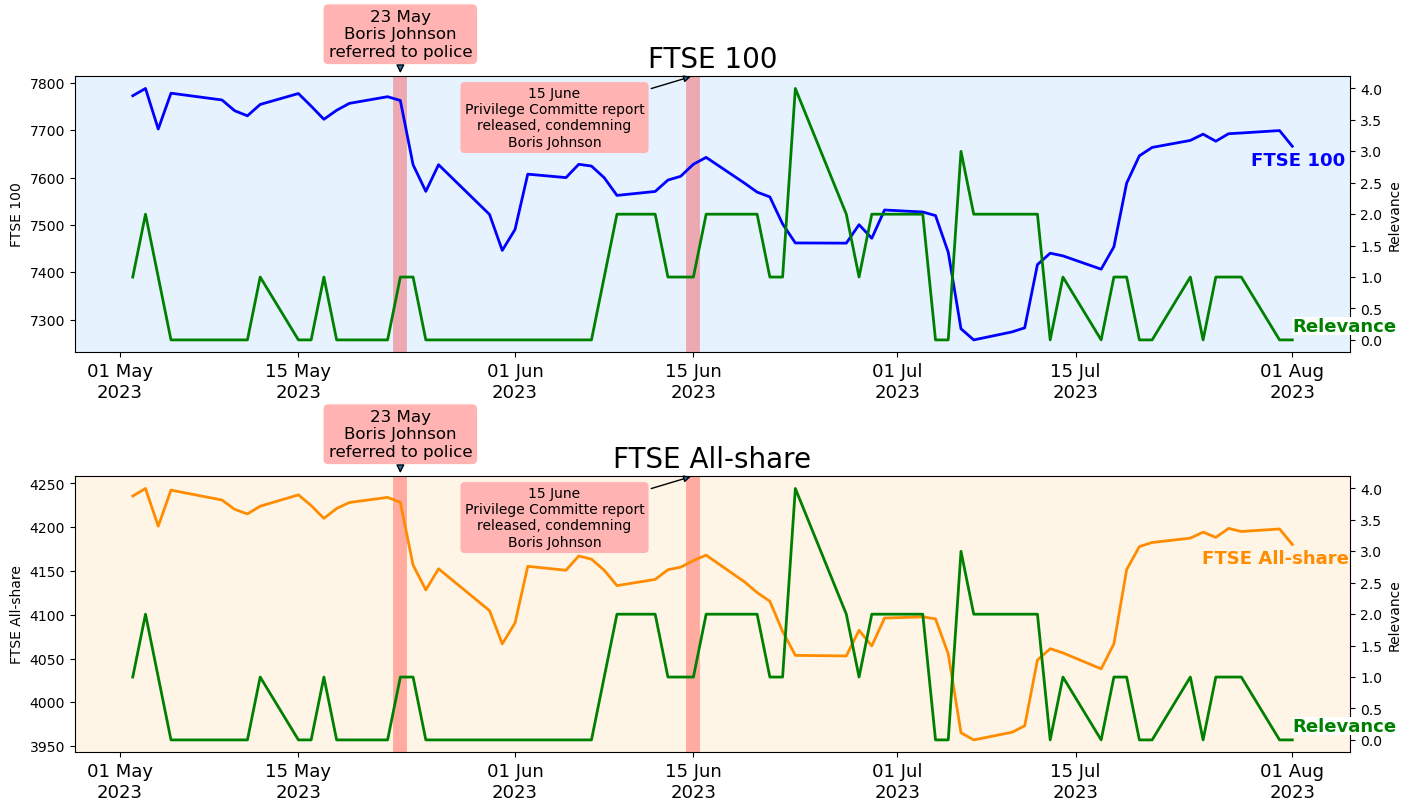

In [88]:
date_format = mdates.DateFormatter('%d %b\n%Y')
fig, axes = plt.subplots(ncols=1, nrows=2, constrained_layout=True, figsize=(14, 8))
axes = axes.flatten()
ax1 = axes[0]
ax2 = axes[1]
ax1.set_facecolor('#e6f3ff')
ax2.set_facecolor('#fff5e6')
# Plot on the first subplot
# Add vertical lines
ax1.axvline(x=pd.Timestamp('2023-05-23'), color='red', linestyle='-', zorder=-1,linewidth=10, alpha=0.3)
ax1.axvline(x=pd.Timestamp('2023-06-15'), color='red', linestyle='-', zorder=-1,linewidth=10, alpha=0.3)
line1, = ax1.plot(df3['Date'], df3['FTSE100'], label='FTSE 100', color='blue',zorder=4, linewidth=2,alpha=1)
ax1.set_ylabel('FTSE 100')
ax1.set_title('FTSE 100', fontsize=20, color='black')

# Plot the 'Relevance' data on the same subplot
ax1_relevance = ax1.twinx()
line2, = ax1_relevance.plot(df3['Date'], df3['Relevance'], color='green', alpha=1, label='Relevance',linewidth=2,zorder=3)
ax1_relevance.set_ylabel('Relevance', color='black')
#colour axis
ax1_relevance.tick_params(axis='y', color='black')
ax1.tick_params(axis='y', colors='black')
ax1.tick_params(axis='x',labelsize=13)
# Remove border around the plot
ax1_relevance.spines['top'].set_visible(False)
ax1_relevance.spines['right'].set_visible(False)
ax1_relevance.spines['bottom'].set_visible(False)
ax1_relevance.spines['left'].set_visible(False)

##annotate
ax1_relevance.annotate("23 May\nBoris Johnson\nreferred to police",
            xy=(pd.Timestamp('2023-05-23'), ax1_relevance.get_ylim()[1]), xycoords='data',
            xytext=(0, 30), textcoords='offset points', size=12, va="center", ha='center',
            bbox=dict(boxstyle="round", fc=(1.0, 0.7, 0.7), ec="none"),
                      arrowprops=dict(arrowstyle="-|>"))

ax1_relevance.annotate("15 June\nPrivilege Committe report\nreleased, condemning\nBoris Johnson",
            xy=(pd.Timestamp('2023-06-15'), ax1_relevance.get_ylim()[1]), xycoords='data',
            xytext=(-100, -30), textcoords='offset points', size=10, va="center", ha='center',
            bbox=dict(boxstyle="round", fc=(1.0, 0.7, 0.7), ec="none"),
                      arrowprops=dict(arrowstyle ="-|>"))
# Annotate the end of the lines with their labels
ax1.annotate('FTSE 100', xy=(df3['Date'].iloc[-1], df3['FTSE100'].iloc[-1]),
             xytext=(-30, -10), textcoords='offset points',
             ha='left', va='center', color=line1.get_color(), fontsize=13, zorder=100, fontweight='bold',
             bbox=dict(boxstyle='round,pad=0.0',facecolor='none',edgecolor='none'))

ax1_relevance.annotate('Relevance', xy=(df3['Date'].iloc[-1], df3['Relevance'].iloc[-1]),
             xytext=(0, 10), textcoords='offset points',
             ha='left', va='center', color=line2.get_color(), fontsize=13, zorder=100, fontweight='bold',
                      bbox=dict(boxstyle='round4,pad=0.0',facecolor='white',edgecolor='none'))

plt.gca().xaxis.set_major_formatter(date_format)

# SECONDPLOT
# Add vertical lines
ax2.axvline(x=pd.Timestamp('2023-05-23'), color='red', linestyle='-', zorder=-1,linewidth=10, alpha=0.3)
ax2.axvline(x=pd.Timestamp('2023-06-15'), color='red', linestyle='-', zorder=-1,linewidth=10, alpha=0.3)
line3, = ax2.plot(df3['Date'], df3['FTSEALL'], label='FTSE All-share', color='darkorange',linewidth=2,zorder=7, alpha=1)
ax2.set_ylabel('FTSE All-share')
ax2.set_title('FTSE All-share', fontsize=20, color='black')
# Plot the 'Relevance' data on the same subplot
ax2_relevance = ax2.twinx()
line4, = ax2_relevance.plot(df3['Date'], df3['Relevance'], color='green', alpha=1, label='Relevance',linewidth=2,zorder=5)
ax2_relevance.set_ylabel('Relevance', color='black')
#colour axis
ax2_relevance.tick_params(axis='y', color='black')
ax2.tick_params(axis='y', colors='black')
ax2.tick_params(axis='x',labelsize=13)
# Remove border around the plot
ax2_relevance.spines['top'].set_visible(False)
ax2_relevance.spines['right'].set_visible(False)
ax2_relevance.spines['bottom'].set_visible(False)
ax2_relevance.spines['left'].set_visible(False)


##annotate
ax2_relevance.annotate("23 May\nBoris Johnson\nreferred to police",
            xy=(pd.Timestamp('2023-05-23'), ax1_relevance.get_ylim()[1]), xycoords='data',
            xytext=(0, 30), textcoords='offset points', size=12, va="center", ha='center',
            bbox=dict(boxstyle="round", fc=(1.0, 0.7, 0.7), ec="none"),
                      arrowprops=dict(arrowstyle="-|>"))

ax2_relevance.annotate("15 June\nPrivilege Committe report\nreleased, condemning\nBoris Johnson",
            xy=(pd.Timestamp('2023-06-15'), ax1_relevance.get_ylim()[1]), xycoords='data',
            xytext=(-100, -30), textcoords='offset points', size=10, va="center", ha='center',
            bbox=dict(boxstyle="round", fc=(1.0, 0.7, 0.7), ec="none"),
                      arrowprops=dict(arrowstyle ="-|>"))

# Annotate the end of the lines with their labels
ax2.annotate('FTSE All-share', xy=(df3['Date'].iloc[-1], df3['FTSEALL'].iloc[-1]),
             xytext=(-65, -10), textcoords='offset points', fontweight='bold',
             ha='left', va='center', color=line3.get_color(), fontsize=13, zorder=100,
                bbox=dict(boxstyle='round,pad=0.1',facecolor='none',edgecolor='none'))

ax2_relevance.annotate('Relevance', xy=(df3['Date'].iloc[-1], df3['Relevance'].iloc[-1]),
             xytext=(0, 10), textcoords='offset points', fontweight='bold',
             ha='left', va='center', color=line4.get_color(), fontsize=13, zorder=100,
                      bbox=dict(boxstyle='round4,pad=0.0',facecolor='white',edgecolor='none'))

plt.gca().xaxis.set_major_formatter(date_format)
plt.savefig('figures/Partygate_newspaper_TF3.png')  # Save the figure in the "figures" folder
plt.show()

### Timeframe 4 14/09/2023 - 15/11/2023

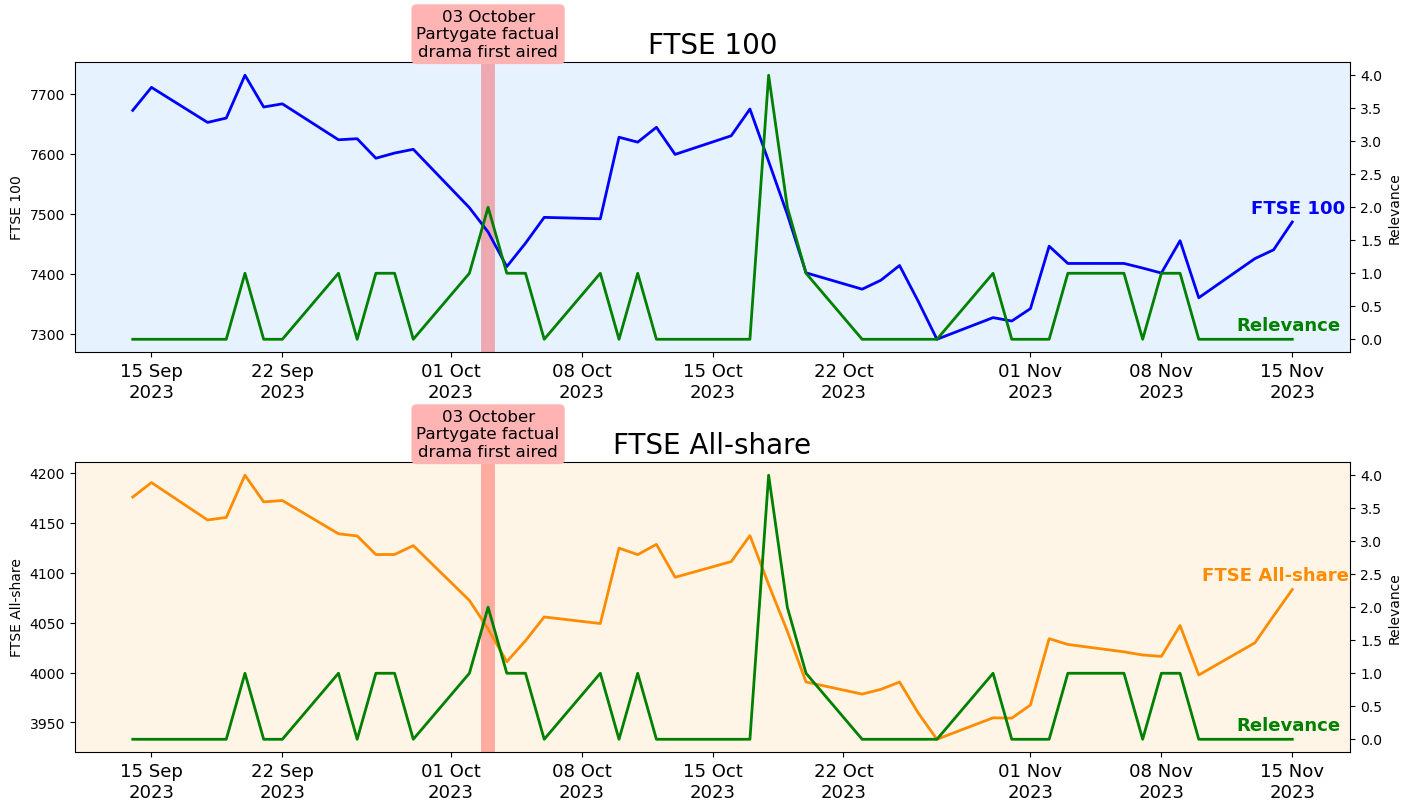

In [89]:
fig, axes = plt.subplots(ncols=1, nrows=2, constrained_layout=True, figsize=(14, 8))
axes = axes.flatten()
ax1 = axes[0]
ax2 = axes[1]
ax1.set_facecolor('#e6f3ff')
ax2.set_facecolor('#fff5e6')
# Plot on the first subplot
# Add vertical lines
ax1.axvline(x=pd.Timestamp('2023-10-03'), color='red', linestyle='-', zorder=-1,linewidth=10, alpha=0.3)
line1, = ax1.plot(df4['Date'], df4['FTSE100'], label='FTSE 100', color='blue',zorder=4, linewidth=2,alpha=1)
ax1.set_ylabel('FTSE 100')
ax1.set_title('FTSE 100', fontsize=20, color='black')

# Plot the 'Relevance' data on the same subplot
ax1_relevance = ax1.twinx()
line2, = ax1_relevance.plot(df4['Date'], df4['Relevance'], color='green', alpha=1, label='Relevance',linewidth=2,zorder=3)
ax1_relevance.set_ylabel('Relevance', color='black')
#colour axis
ax1_relevance.tick_params(axis='y', color='black')
ax1.tick_params(axis='y', colors='black')
ax1.tick_params(axis='x',labelsize=13)
# Remove border around the plot
ax1_relevance.spines['top'].set_visible(False)
ax1_relevance.spines['right'].set_visible(False)
ax1_relevance.spines['bottom'].set_visible(False)
ax1_relevance.spines['left'].set_visible(False)

##annotate
ax1_relevance.annotate("03 October\nPartygate factual\ndrama first aired",
            xy=(pd.Timestamp('2023-10-03'), ax1_relevance.get_ylim()[1]), xycoords='data',
            xytext=(0, 20), textcoords='offset points', size=12, va="center", ha='center',
            bbox=dict(boxstyle="round", fc=(1.0, 0.7, 0.7), ec="none"))

# Annotate the end of the lines with their labels
ax1.annotate('FTSE 100', xy=(df4['Date'].iloc[-1], df4['FTSE100'].iloc[-1]),
             xytext=(-30, 10), textcoords='offset points',
             ha='left', va='center', color=line1.get_color(), fontsize=13, zorder=100, fontweight='bold',
             bbox=dict(boxstyle='round,pad=0.0',facecolor='none',edgecolor='none'))

ax1_relevance.annotate('Relevance', xy=(df4['Date'].iloc[-1], df4['Relevance'].iloc[-1]),
             xytext=(-40, 10), textcoords='offset points',
             ha='left', va='center', color=line2.get_color(), fontsize=13, zorder=100, fontweight='bold',
                      bbox=dict(boxstyle='round4,pad=0.0',facecolor='none',edgecolor='none'))

plt.gca().xaxis.set_major_formatter(date_format)

# SECONDPLOT
# Add vertical lines
ax2.axvline(x=pd.Timestamp('2023-10-03'), color='red', linestyle='-', zorder=-1,linewidth=10, alpha=0.3)

line3, = ax2.plot(df4['Date'], df4['FTSEALL'], label='FTSE All-share', color='darkorange',linewidth=2,zorder=7, alpha=1)
ax2.set_ylabel('FTSE All-share')
ax2.set_title('FTSE All-share', fontsize=20, color='black')
# Plot the 'Relevance' data on the same subplot
ax2_relevance = ax2.twinx()
line4, = ax2_relevance.plot(df4['Date'], df4['Relevance'], color='green', alpha=1, label='Relevance',linewidth=2,zorder=5)
ax2_relevance.set_ylabel('Relevance', color='black')
#colour axis
ax2_relevance.tick_params(axis='y', color='black')
ax2.tick_params(axis='y', colors='black')
ax2.tick_params(axis='x',labelsize=13)
# Remove border around the plot
ax2_relevance.spines['top'].set_visible(False)
ax2_relevance.spines['right'].set_visible(False)
ax2_relevance.spines['bottom'].set_visible(False)
ax2_relevance.spines['left'].set_visible(False)

##annotate
ax2_relevance.annotate("03 October\nPartygate factual\ndrama first aired",
            xy=(pd.Timestamp('2023-10-03'), ax1_relevance.get_ylim()[1]), xycoords='data',
            xytext=(0, 20), textcoords='offset points', size=12, va="center", ha='center',
            bbox=dict(boxstyle="round", fc=(1.0, 0.7, 0.7), ec="none"))

# Annotate the end of the lines with their labels
ax2.annotate('FTSE All-share', xy=(df4['Date'].iloc[-1], df4['FTSEALL'].iloc[-1]),
             xytext=(-65, 10), textcoords='offset points', fontweight='bold',
             ha='left', va='center', color=line3.get_color(), fontsize=13, zorder=100,
                bbox=dict(boxstyle='round,pad=0.1',facecolor='none',edgecolor='none'))

ax2_relevance.annotate('Relevance', xy=(df4['Date'].iloc[-1], df4['Relevance'].iloc[-1]),
             xytext=(-40, 10), textcoords='offset points', fontweight='bold',
             ha='left', va='center', color=line4.get_color(), fontsize=13, zorder=100,
                      bbox=dict(boxstyle='round4,pad=0.0',facecolor='none',edgecolor='none'))

plt.gca().xaxis.set_major_formatter(date_format)
plt.savefig('figures/Partygate_newspaper_TF4.png')  # Save the figure in the "figures" folder
plt.show()

### Save to CSV

In [90]:
# Assuming df is your DataFrame
df1.to_csv('Partygate_newspaper_preprocessed_timeframe1.csv', index=False)
df2.to_csv('Partygate_newspaper_preprocessed_timeframe2.csv', index=False)
df3.to_csv('Partygate_newspaper_preprocessed_timeframe3.csv', index=False)
df4.to_csv('Partygate_newspaper_preprocessed_timeframe4.csv', index=False)

### Save to stata dta

In [91]:
df1.to_stata('Partygate_newspaper_preprocessed_timeframe1.dta', version=117)
df2.to_stata('Partygate_newspaper_preprocessed_timeframe2.dta', version=117)
df3.to_stata('Partygate_newspaper_preprocessed_timeframe3.dta', version=117)
df4.to_stata('Partygate_newspaper_preprocessed_timeframe4.dta', version=117)

In [92]:
df.head()

,index,Date,week,Relevance,occurrences_rolling,occurrences_lead1,occurrences_lead2,occurrences_lead3,FTSE100,FTSEALL
0,3,2022-01-04,1,0.0,0.0,0.0,0.0,0.0,7505.15,4276.18
1,4,2022-01-05,1,0.0,0.0,0.0,0.0,0.0,7516.87,4277.51
2,5,2022-01-06,1,0.0,0.0,0.0,0.0,0.0,7450.37,4235.63
3,6,2022-01-07,1,0.0,0.0,0.0,0.0,0.0,7485.28,4249.43
4,9,2022-01-10,2,0.0,0.0,1.0,2.0,3.0,7445.25,4219.71
